## Connect to database

In [6]:
# Connect to Postgres
import os
import psycopg2
def newCursor():
    try:
        connection = psycopg2.connect(user = os.environ["DB_USER"],
                                      host = os.environ["DB_HOST"],
                                      password = os.environ["DB_PASSWORD"],
                                      port = "5432",
                                      database = os.environ["DB_DATABASE"])

        cursor = connection.cursor()
        return cursor

    except (Exception, psycopg2.Error) as error:
        print("Error while connecting to PostgreSQL", error)
        return error
    
print(os.environ["DB_USER"])

KeyError: 'DB_USER'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
c = newCursor()
q = """
SELECT *
FROM api."WEETS_reference_SyntheticIndividuals"
WHERE sex = 'female' -- and age >=18
"""

c.execute(q)
cols = [desc[0] for desc in c.description]
df = pd.DataFrame(c.fetchall(), columns=cols)
df.head(20)
    
df = df[['age', 'ethnic_group', 'nationality', 'marital_and_civil_partnership_status', 
    'no_of_dependents', 'residential_status', 'highest_level_of_qualifications', 'employment_status', 
    'have_a_mortgage', 'have_other_borrowing', 'uk_passport_no', 'residence_permit_no', 'international_passport', 
    'drivers_license_no', 'credit_rating']]
    
df.head()    

In [4]:
df.head(20)

NameError: name 'df' is not defined

## Data Wrangling

#### Changing columns

In [70]:
# # df.marital_and_civil_partnership_status.unique()

# df['no_of_dependents'][1]
# # df[]
# df.loc[:, 'no_of_dependents']

# df['has_children'] = np.where(df.loc[:, 'no_of_dependents'].isin(['zero']), 0, 1) 
# df = df.drop('no_of_dependents', axis=1)

# change age datatype to float

In [68]:
df.head()

,age,ethnic_group,nationality,marital_and_civil_partnership_status,residential_status,highest_level_of_qualifications,employment_status,have_a_mortgage,have_other_borrowing,uk_passport_no,residence_permit_no,international_passport,drivers_license_no,credit_rating,has_children
0,59.47,White,United Kingdom,Married / civil partnership,Owned with a mortgage or loan,Level 1,Employee: Full-time,Yes,No,5302338224GBR,,,,Good,1
1,3.74,White,Italy,Single,Living rent free,No qualifications,Other,No,No,,CC40601219,T99347956380ITA,,,0
2,53.41,White,United Kingdom,Single,Owned outright,Level 1,Homemaker,No,No,1366019281GBR,,,SMITH640147L99AM,Fair,1
3,52.42,White,United Kingdom,Single,Owned outright,Level 4 or above,Employee: Full-time,No,No,2715365418GBR,,,HARRI640098F99QN,Fair,1
4,74.32,White,United Kingdom,Single,Owned outright,No qualifications,Retired,No,No,3514153243GBR,,,KAUR9451196B99NZ,Excellent,1


In [73]:
df = df[~df['credit_rating'].isin([''])]

df['is_credit_good'] = np.where(df.loc[:, 'credit_rating'].isin(['Fair', 'Poor']), 0, 1) 
df = df.drop('credit_rating', axis=1)

df['is_poc'] = np.where(df.loc[:, 'ethnic_group'].isin(['White']), 0, 1) 
df = df.drop('ethnic_group', axis=1)

df['is_foreign_national'] = np.where(df.loc[:, 'nationality'].isin(['United Kingdom']), 0, 1) 
df = df.drop('nationality', axis=1)

df['is_single'] = np.where(df.loc[:, 'marital_and_civil_partnership_status'].isin(['Single']), 0, 1) 
df = df.drop('marital_and_civil_partnership_status', axis=1)

df['has_children'] = np.where(df.loc[:, 'no_of_dependents'].isin(['zero']), 0, 1) 
df = df.drop('no_of_dependents', axis=1)

df['is_home_owner'] = np.where(df.loc[:, 'residential_status'].isin(['Living rent free',
       'Owned outright', 'Rented from council (Local Authority)',
       'Social rented', 'Private rented', 'Other']), 0, 1) 
df = df.drop('residential_status', axis=1)

df['has_qualifications'] = np.where(df.loc[:, 'highest_level_of_qualifications'].isin(['No qualifications']), 0, 1) 
df = df.drop('highest_level_of_qualifications', axis=1)

df['is_working'] = np.where(df.loc[:, 'employment_status'].isin(['Other', 'Unemployed']), 0, 1) 
df = df.drop('employment_status', axis=1)

df['has_a_mortgage'] = np.where(df.loc[:, 'have_a_mortgage'].isin(['No']), 0, 1) 
df = df.drop('have_a_mortgage', axis=1)

df['has_uk_passport'] = np.where(df.loc[:, 'uk_passport_no'].isin(['']), 0, 1) 
df = df.drop('uk_passport_no', axis=1)

df['has_other_borrowing'] = np.where(df.loc[:, 'have_other_borrowing'].isin(['No']), 0, 1) 
df = df.drop('have_other_borrowing', axis=1)

df['has_residence_permit'] = np.where(df.loc[:, 'residence_permit_no'].isin(['']), 0, 1) 
df = df.drop('residence_permit_no', axis=1)

df['has_international_passport'] = np.where(df.loc[:, 'international_passport'].isin(['']), 0, 1) 
df = df.drop('international_passport', axis=1)

df['has_drivers_license'] = np.where(df.loc[:, 'drivers_license_no'].isin(['']), 0, 1) 
df = df.drop('drivers_license_no', axis=1)



df.head(20) # has children column is broken

# def data_preprocessing(col_name, new_col_name, zero_list):
#     global df
#     df[new_col_name] = np.where(df.loc[:, col_name].isin(zero_list), 0, 1) 
#     df = df.drop(col_name, axis=1)
    
#     return df

#data_preprocessing('credit_rating', 'is_credit_good')


#df = df.drop('ethnic_group', axis=1)

# df['has_uk_passport'] = if_exists('uk_passport_no')

# df['has_residence_permit'] = if_exists('residence_permit_no')

# df['has_international_passport'] = if_exists('')


,age,is_credit_good,is_poc,is_foreign_national,is_single,has_children,is_home_owner,has_qualifications,is_working,has_a_mortgage,has_uk_passport,has_other_borrowing,has_residence_permit,has_international_passport,has_drivers_license
0,59.47,1,0,0,1,1,1,1,1,1,1,0,0,0,0
2,53.41,0,0,0,0,1,0,1,1,0,1,0,0,0,1
3,52.42,0,0,0,0,1,0,1,1,0,1,0,0,0,1
4,74.32,1,0,0,0,1,0,0,1,0,1,0,0,0,1
5,91.35,1,1,0,1,1,1,1,1,1,0,0,0,0,0
6,69.5,1,0,1,1,1,0,1,1,0,0,0,1,1,0
7,32.31,1,0,0,1,1,0,1,1,0,1,0,0,0,1
8,58.44,1,1,1,1,1,0,1,1,0,0,0,1,1,1
9,31.22,1,0,0,1,1,1,0,1,1,1,0,0,0,1
10,35.84,1,0,0,1,1,0,1,1,0,0,0,0,0,0


In [24]:
df.head()

,age,is_credit_good,is_poc,is_foreign_national,is_single,has_children,is_home_owner,has_qualifications,is_working,has_a_mortgage,has_uk_passport,has_other_borrowing,has_residence_permit,has_international_passport,has_drivers_license
0,59.47,1,0,0,1,1,1,1,1,1,1,0,0,0,0
2,53.41,0,0,0,1,1,0,1,1,0,1,0,0,0,1
3,52.42,0,0,0,1,1,0,1,1,0,1,0,0,0,1
4,74.32,1,0,0,1,1,0,0,1,0,1,0,0,0,1
5,91.35,1,1,0,1,1,1,1,1,1,0,0,0,0,0


In [25]:
df.shape

(203928, 15)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text major ticklabel objects>)

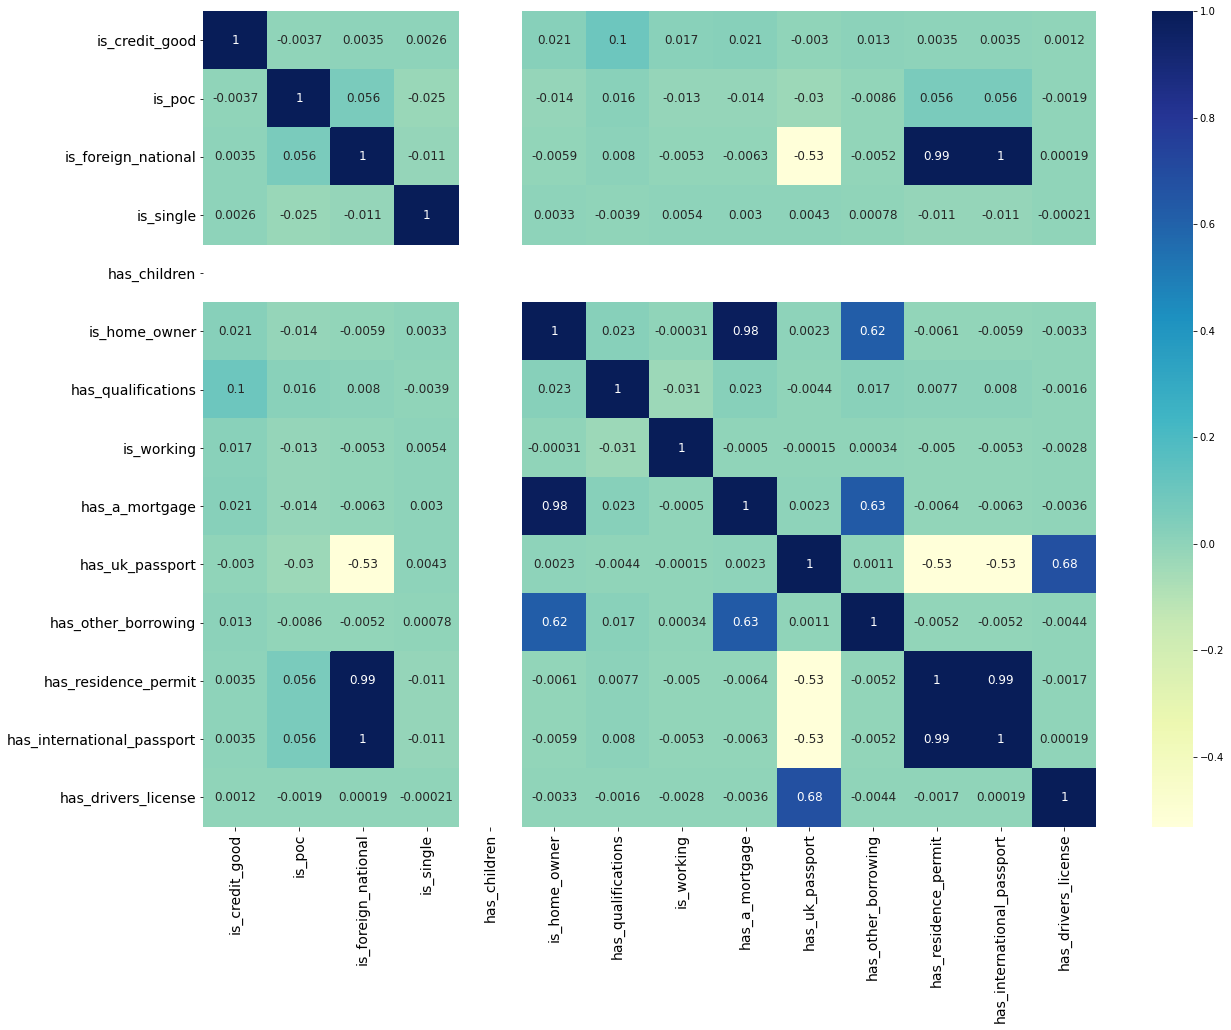

In [74]:
# correlation matrix showing correlation co-effiecients 
corr_matrix = df.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)